## Example:Fitting Sinus Wave

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['legend.fontsize'] = 16
rcParams['axes.labelsize'] = 16

In [2]:
def generate_data(t, A, sigma, omega, noise=0, n_outliers=0, random_state=0):
    y = A * np.sin(omega * t+sigma)
    rnd = np.random.RandomState(random_state)
    error = noise * rnd.randn(t.size)
    outliers = rnd.randint(0, t.size, n_outliers)
    error[outliers] *= 35
    return y + error

In [3]:
A = 3
sigma = 0.1
omega = 0.1 * 2 * np.pi
x_true = np.array([A, sigma, omega])
noise = 0.1
t_min = 0
t_max = 30

In [4]:
t_train = np.linspace(t_min, t_max, 30)
y_train = generate_data(t_train, A, sigma, omega, noise=noise, n_outliers=4)

In [5]:
def fun(x, t, y):
    return x[0] *  np.sin(x[2] * t+ x[1]) - y

In [6]:
x0 = np.ones(3)
x0[0]=2.95

In [7]:
from scipy.optimize import least_squares


In [14]:
res_lsq = least_squares(fun, x0, args=(t_train, y_train))


In [15]:
res_robust = least_squares(fun, x0, loss='soft_l1', f_scale=0.5, args=(t_train, y_train),ftol=1e-14)


In [16]:
t_test = np.linspace(t_min, t_max, 300)
y_test = generate_data(t_test, A, sigma, omega)

In [17]:
y_lsq = generate_data(t_test, *res_lsq.x)
y_robust = generate_data(t_test, *res_robust.x)

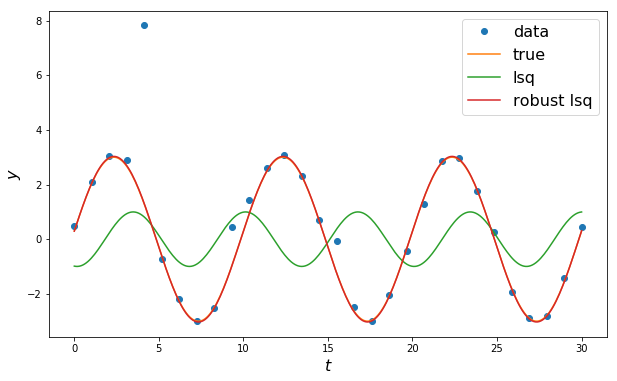

In [18]:
plt.plot(t_train, y_train, 'o', label='data')
plt.plot(t_test, y_test, label='true')
plt.plot(t_test, y_lsq, label='lsq')
plt.plot(t_test, y_robust, label='robust lsq')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend();

In [19]:
res_robust.x

array([-3.02904763,  3.23910677,  0.62843124])

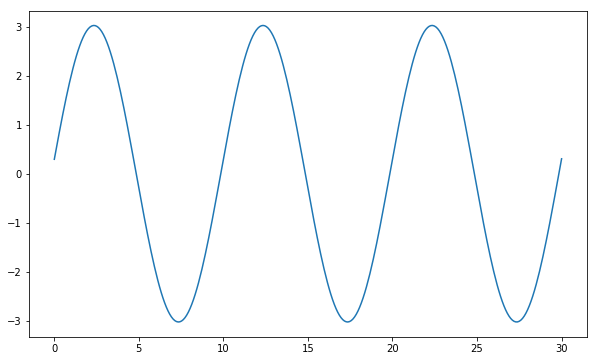

In [20]:
plt.plot(t_test, y_robust, label='robust lsq')


In [28]:
y_train

array([ 0.47590548,  2.08489839,  3.05420737,  2.88623997,  7.81875873,
       -0.71820898, -2.17521847, -3.00927897, -2.50732793,  0.45553961,
        1.43834005,  2.61438296,  3.07295311,  2.31475384,  0.71368302,
       -0.06908127, -2.48932976, -2.98493593, -2.04986413, -0.43460092,
        1.2698943 ,  2.8429448 ,  2.98367937,  1.76113914,  0.25196752,
       -1.94100021, -2.87928774, -2.81480235, -1.4147446 ,  0.44643613])